In [76]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression

In [77]:
df=read_csv('homeprices.csv')
df     

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4400,5.0,8,795000


In [78]:
m=int(df.bedrooms.median())
df.bedrooms=df.bedrooms.fillna(m)

In [79]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4400,5.0,8,795000


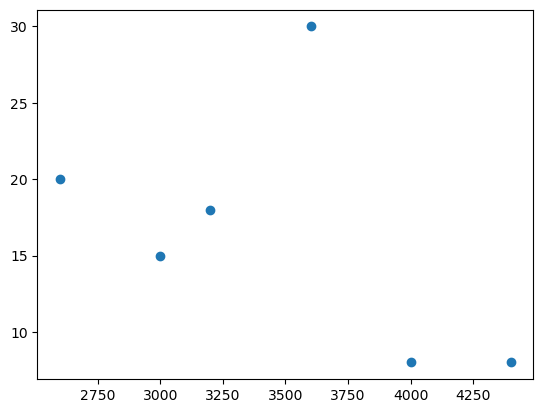

In [80]:
x=df.iloc[: , 0:1]
y=df.iloc[: , 2:3]
scatter(x,y)

In [81]:
r=LinearRegression()
r.fit(x,y)

LinearRegression()

In [82]:
r.score(x,y)

0.2361761456305571

MULTIPLE LINEAR REG.

In [83]:
r=LinearRegression()
r.fit(df[['area','bedrooms','age']], df['price'])


LinearRegression()

In [84]:
r.score(df[['area','bedrooms','age']], df['price'])

0.9760698937818199

PREDICT PRICE OF HOUSE WITH INPUT- (area in sq. ft , no. of bedrooms , age of house)

In [85]:
r.predict([[3000,3,40]])

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([427301.78627387])

In [86]:
p=r.predict([[5000,6,9]])
p

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([831726.41805084])

In [87]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=3)

In [88]:

pred=k.fit_predict(df[['area','bedrooms','age']], df['price']) 

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [89]:
pred

array([1, 1, 0, 0, 2, 2])

In [90]:
df['cluster']=pred
df.head()

,area,bedrooms,age,price,cluster
0,2600,3.0,20,550000,1
1,3000,4.0,15,565000,1
2,3200,4.0,18,610000,0
3,3600,3.0,30,595000,0
4,4000,5.0,8,760000,2


In [91]:
k.cluster_centers_

array([[3.40e+03, 3.50e+00, 2.40e+01],
       [2.80e+03, 3.50e+00, 1.75e+01],
       [4.20e+03, 5.00e+00, 8.00e+00]])

In [92]:
x=k.cluster_centers_[:,0]  #all rows in 0th col.
y=k.cluster_centers_[:,1]  #all rows in 1st col.

Draw clusters for age - price columns

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


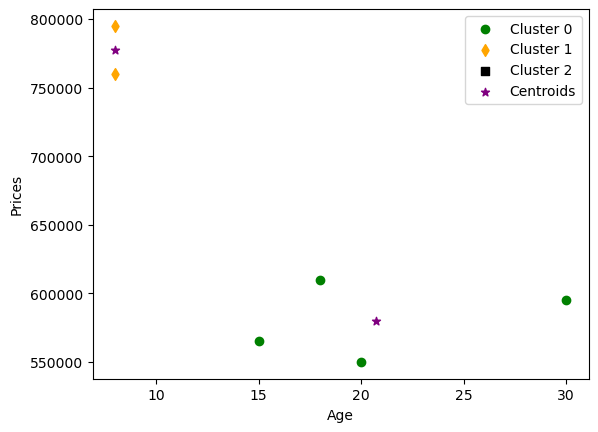

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'area', 'bedrooms', 'age', and 'price'

# Select the features for clustering
X = df[['age', 'price']]

# Specify the number of clusters (adjust k as needed)
k = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X)

# Separate the data into clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plot the clusters
plt.scatter(df1.age, df1['price'], color='green', marker='o', label='Cluster 0')
plt.scatter(df2.age, df2['price'], color='orange', marker='d', label='Cluster 1')
plt.scatter(df3.age, df3['price'], color='black', marker='s', label='Cluster 2')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

# Set labels and legend
plt.xlabel('Age')
plt.ylabel('Prices')
plt.legend()
plt.show()


3rd cluster(cluster 2)  not req.

2 clusters are sufficient

In [94]:
s = []
k_rng = range(1, 7)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age', 'price']])  # Corrected column names to 'age' and 'price'
    s.append(km.inertia_)


c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

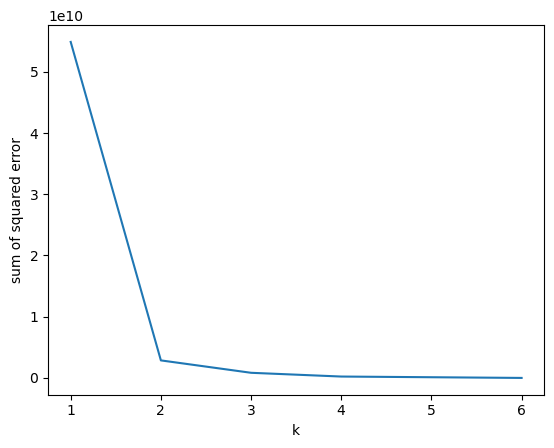

In [95]:
plot(k_rng,s)
xlabel('k')
ylabel('sum of squared error')
show()

1. elbow point is 2 .
2. so its enough to draw 2 clusters(k=2) for this data set

now , draw for bedroom -price(data is not suitable for clustering)

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


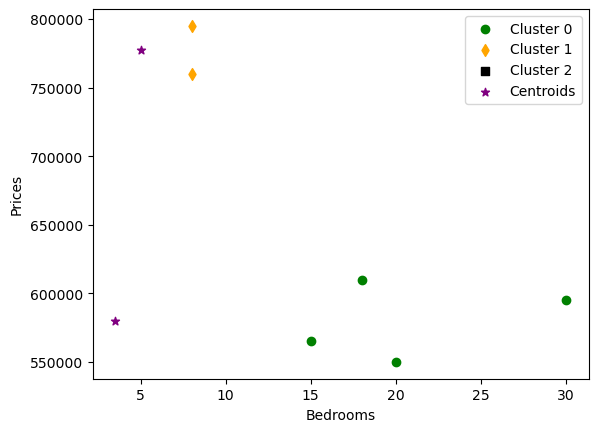

In [96]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'area', 'bedrooms', 'age', and 'price'

# Select the features for clustering
X = df[['bedrooms', 'price']]

# Specify the number of clusters (adjust k as needed)
k = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X)

# Separate the data into clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plot the clusters
plt.scatter(df1.age, df1['price'], color='green', marker='o', label='Cluster 0')
plt.scatter(df2.age, df2['price'], color='orange', marker='d', label='Cluster 1')
plt.scatter(df3.age, df3['price'], color='black', marker='s', label='Cluster 2')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

# Set labels and legend
plt.xlabel('Bedrooms')
plt.ylabel('Prices')
plt.legend()
plt.show()


using scaling also does not work for this dataset

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler=MinMaxScaler()
scaler.fit(df[['price']])
df['price']=scaler.transform(df[['price']])

In [99]:
scaler.fit(df[['bedrooms']])
df['bedrooms']=scaler.transform(df[['bedrooms']])

In [100]:
df.head()

,area,bedrooms,age,price,cluster
0,2600,0.0,20,0.000000,0
1,3000,0.5,15,0.061224,0
2,3200,0.5,18,0.244898,0
3,3600,0.0,30,0.183673,0
4,4000,1.0,8,0.857143,1


In [101]:
km=KMeans(n_clusters=3)
pred=km.fit_predict(df[['bedrooms','price']])    

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [102]:
km.cluster_centers_

array([[0.        , 0.09183673],
       [1.        , 0.92857143],
       [0.5       , 0.15306122]])

In [103]:
x=km.cluster_centers_[:,0]
y=km.cluster_centers_[:,1]

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


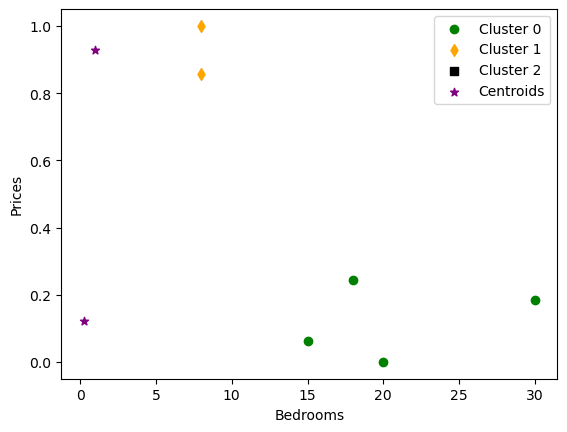

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'area', 'bedrooms', 'age', and 'price'

# Select the features for clustering
X = df[['bedrooms', 'price']]

# Specify the number of clusters (adjust k as needed)
k = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X)

# Separate the data into clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plot the clusters
plt.scatter(df1.age, df1['price'], color='green', marker='o', label='Cluster 0')
plt.scatter(df2.age, df2['price'], color='orange', marker='d', label='Cluster 1')
plt.scatter(df3.age, df3['price'], color='black', marker='s', label='Cluster 2')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

# Set labels and legend
plt.xlabel('Bedrooms')
plt.ylabel('Prices')
plt.legend()
plt.show()


For area - price

c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\debna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


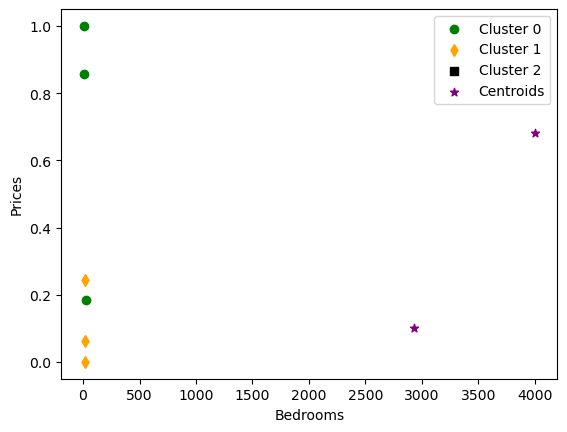

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'area', 'bedrooms', 'age', and 'price'

# Select the features for clustering
X = df[['area', 'price']]

# Specify the number of clusters (adjust k as needed)
k = 2

# Fit the KMeans model
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X)

# Separate the data into clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plot the clusters
plt.scatter(df1.age, df1['price'], color='green', marker='o', label='Cluster 0')
plt.scatter(df2.age, df2['price'], color='orange', marker='d', label='Cluster 1')
plt.scatter(df3.age, df3['price'], color='black', marker='s', label='Cluster 2')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

# Set labels and legend
plt.xlabel('Bedrooms')
plt.ylabel('Prices')
plt.legend()
plt.show()


Not suitable for this dataset